In [2]:
import numpy as np
import scipy as sp
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

import deleon_berne as db

import caffeine
from tqdm import tqdm

import matplotlib.pylab as plt
import matplotlib as mpl
from pylab import rcParams

In [3]:
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
plt.style.use('seaborn-white')

tick_labelsize = 15
axes_labelsize = 25
mpl.rcParams['xtick.labelsize'] = tick_labelsize
mpl.rcParams['ytick.labelsize'] = tick_labelsize
mpl.rcParams['axes.labelsize'] = axes_labelsize
mpl.rcParams['font.size'] = 20

output_filename = 'surfaces_of_section/'

### $(x,y)$ sections $p_x = 0$. Varying $\lambda$ and $\zeta$.

In [4]:
file_name = output_filename+'xy_px0_zeta_lambda'

# section_type = 0: (x, y),  px = constant
# section_type = 1: (x, y),  py = constant
# section_type = 2: (x, px), y  = constant
# section_type = 3: (y, py), x  = constant

section_type = 0
section_constant = 0

energy_level = 1.02

lambdas = [0.1, 1.5, 3.0, 4.5]
zetas = [1e-20, 0.1, 1.0, 3.0]

#----------------------------------------------------------------------------

init_grid_resolution = 100
contour_resolution = 100

trajectory_runtime = 100
lambda_mesh, zeta_mesh = np.meshgrid(lambdas, zetas)

ps_list = []


for lambda_num in range(len(lambdas)):

    ps_row = []

    for zeta_num in range(len(zetas)):
        lamb = lambdas[lambda_num]
        zeta = zetas[zeta_num]
        
        fig_number = lambda_num*4+zeta_num + 1
        
        #             m_x, m_y, lamb, zeta, V,  y_w,     e_s, D_x
        parameters = [8,   8,   lamb,  zeta,  1,  1/2**.5, 1,   10]

        PS = db.poincare_section(parameters, section_type, section_constant, energy_level,\
                     init_grid_resolution, contour_resolution, trajectory_runtime, \
                                 pbar_label = 'section {}'.format(fig_number)\
                                             +'/{}'.format(len(lambdas)*len(zetas)))

        ps_row.append(PS)

    ps_list.append(ps_row)

# np.save(file_name,ps_list)

section 16/16: 100%|██████████| 6156/6156 [1:15:52<00:00,  1.35it/s]


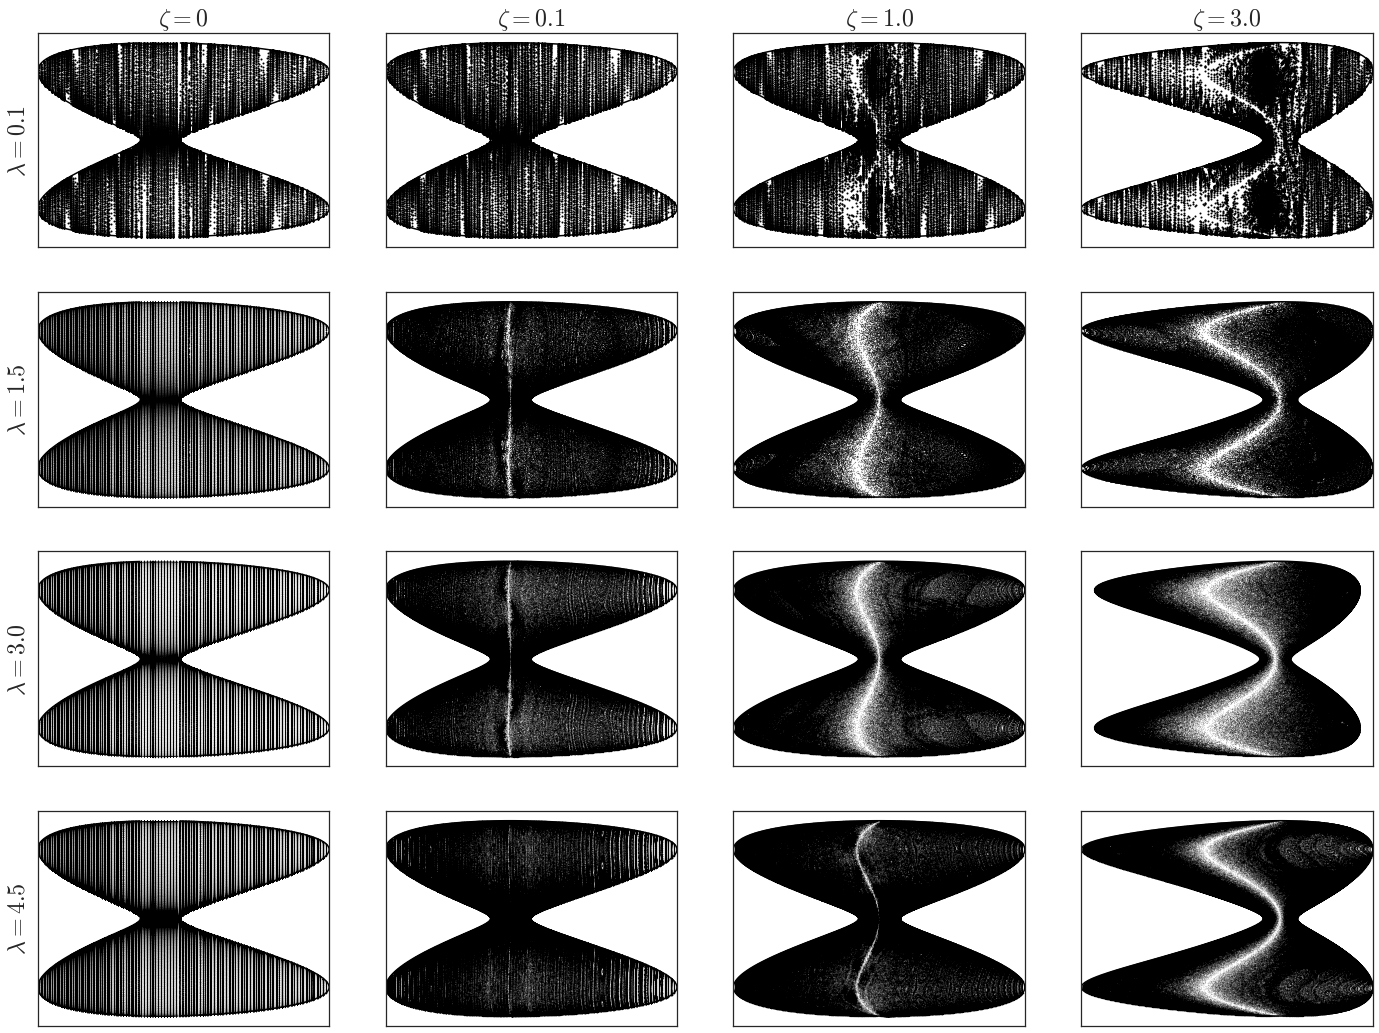

In [19]:
file_name = output_filename+'xy_px0_zeta_lambda'

lambdas = [0.1, 1.5, 3.0, 4.5]
zetas = [0, 0.1, 1.0, 3.0]

marker_sizes = [1, 0.01, 0.001, 0.0005]

cols = ['$\zeta = {}$'.format(zeta) for zeta in zetas]
rows = ['$\lambda = {}$'.format(lamb) for lamb in lambdas]

#----------------------------------------------------------------------------

fig, axs = plt.subplots(4,4, figsize=(20, 15))

for ax, col in zip(axs[0], cols):
    ax.set_title(col)
for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')
fig.tight_layout()

with open(file_name+'.npy', 'rb') as ps_list:
    ps_list = np.load(ps_list, allow_pickle=True)

for lambda_num in range(len(lambdas)):
    for zeta_num in range(len(zetas)):

        lamb = lambdas[lambda_num]
        zeta = zetas[zeta_num]
        
        h_cmesh, v_cmesh, energy_mesh, coord_nums, traj_intersect = ps_list[lambda_num][zeta_num]

        axs[lambda_num][zeta_num].contour(h_cmesh, v_cmesh, energy_mesh, colors='black', levels = [1.02])
        axs[lambda_num][zeta_num].scatter(traj_intersect[:,coord_nums[0]],traj_intersect[:,coord_nums[1]],\
                                          s = marker_sizes[lambda_num], c = 'k')
        axs[lambda_num][zeta_num].set_xticklabels([])
        axs[lambda_num][zeta_num].set_yticklabels([])

plt.savefig(file_name)

### $(y, p_y)$, $x=0$ section varying energy

In [13]:
file_name = output_filename+'ypy_x0_energy'

# section_type = 0: (x, y),  px = constant
# section_type = 1: (x, y),  py = constant
# section_type = 2: (x, px), y  = constant
# section_type = 3: (y, py), x  = constant
section_type = 3
section_constant = 0

#             m_x, m_y, lamb, zeta, V,  y_w,     e_s, D_x
parameters = [8,   8,   1.5,  1.0,  1,  1/2**.5, 1,   10]

init_grid_resolution = 50
contour_resolution = 100

trajectory_runtime = 100

energies = [1.02, 1.3, 3, 6]

ps_list = []

for fignum in range(len(energies)):
    
    energy_level = energies[fignum]
        
    PS = db.poincare_section(parameters, section_type, section_constant, energy_level,\
                 init_grid_resolution, contour_resolution, trajectory_runtime)
    
    ps_list.append(PS)

np.save(file_name,ps_list)

Processing: 100%|██████████| 2120/2120 [09:09<00:00,  3.86it/s]


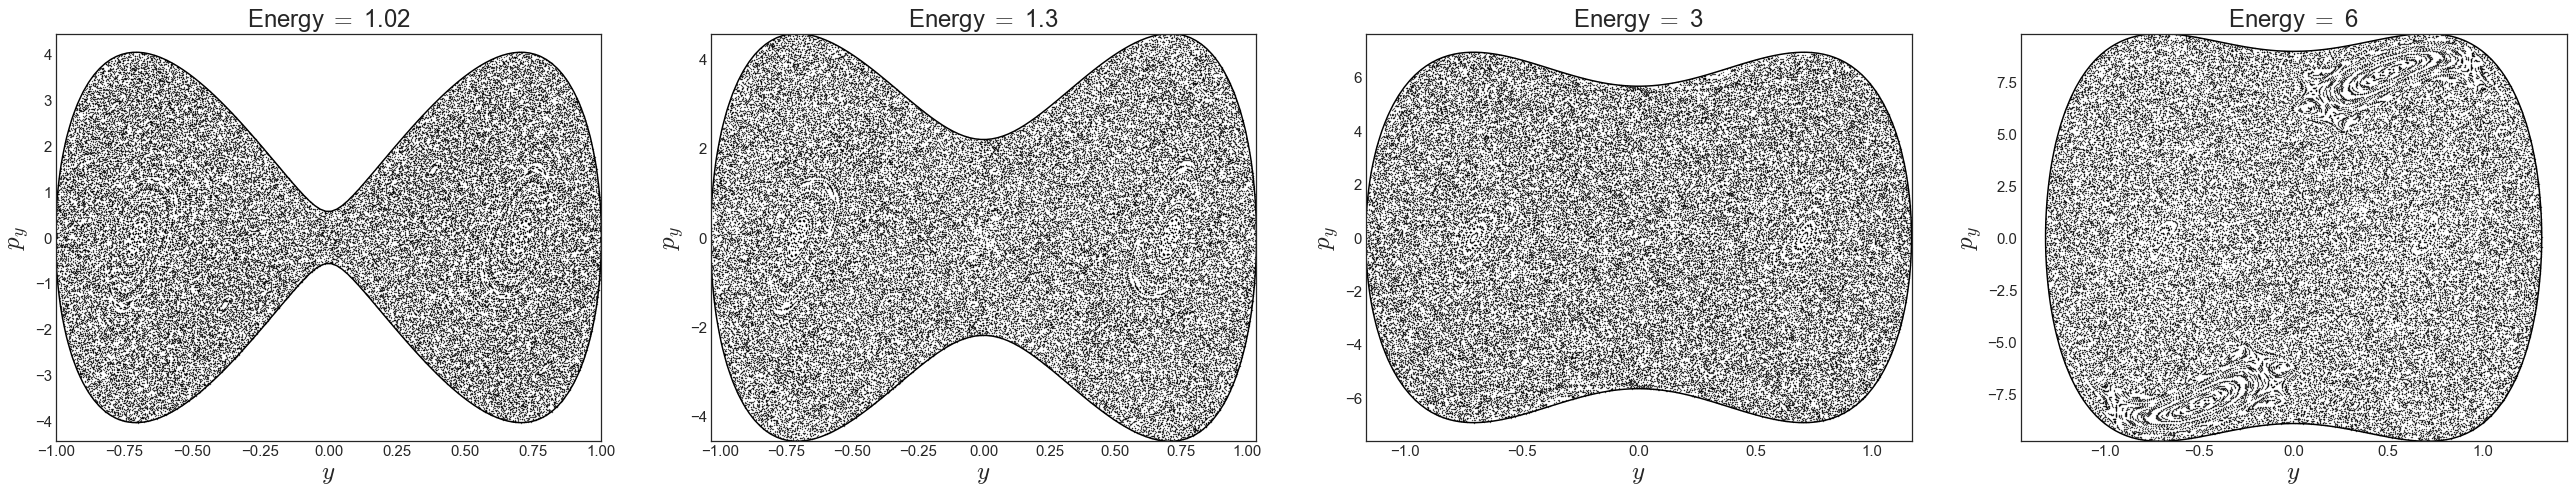

In [17]:
file_name = output_filename+'ypy_x0_energy'

fig, axs = plt.subplots(1,4, figsize=(45, 7.5))
axs = axs.ravel()

energies = [1.02, 1.3, 3, 6]

with open(file_name+'.npy', 'rb') as ps_list:
    
    ps_list = np.load(ps_list, allow_pickle=True)

    for fignum in range(len(energies)):

        energy_level = energies[fignum]

        h_cmesh, v_cmesh, energy_mesh, coord_nums, traj_intersect = ps_list[fignum]

        axs[fignum].contour(h_cmesh, v_cmesh, energy_mesh, colors='black', levels = [energy_level])
        axs[fignum].scatter(traj_intersect[:,coord_nums[0]],traj_intersect[:,coord_nums[1]],s = .1, c = 'k')
        axs[fignum].set_title("Energy $=$ "+str(energy_level))
        axs[fignum].set_xlabel("$y$")
        axs[fignum].set_ylabel("$p_y$")

plt.savefig(file_name)

### $(x, p_x)$, $y=0$ section, varying $\lambda$ and $\zeta$.

In [21]:
file_name = output_filename+'xpx_y0_zeta_lambda'

# section_type = 0: (x, y),  px = constant
# section_type = 1: (x, y),  py = constant
# section_type = 2: (x, px), y  = constant
# section_type = 3: (y, py), x  = constant

section_type = 2
section_constant = 0

energy_level = 1.02

lambdas = [0.1, 1.5, 2.5, 4.5]
zetas = [1e-20, 0.1, 1.0, 3.0]

#----------------------------------------------------------------------------

init_grid_resolution = 50
contour_resolution = 100

trajectory_runtime = 300
lambda_mesh, zeta_mesh = np.meshgrid(lambdas, zetas)

ps_list = []


for lambda_num in range(len(lambdas)):

    ps_row = []

    for zeta_num in range(len(zetas)):
        lamb = lambdas[lambda_num]
        zeta = zetas[zeta_num]
        
        fig_number = lambda_num*4+zeta_num + 1
        
        #             m_x, m_y, lamb, zeta, V,  y_w,     e_s, D_x
        parameters = [8,   8,   lamb,  zeta,  1,  1/2**.5, 1,   10]

        PS = db.poincare_section(parameters, section_type, section_constant, energy_level,\
                     init_grid_resolution, contour_resolution, trajectory_runtime, \
                                 pbar_label = 'section {}'.format(fig_number)\
                                             +' out of {}'.format(len(lambdas)*len(zetas)))

        ps_row.append(PS)

    ps_list.append(ps_row)

np.save(file_name,ps_list)

section 16 out of 16: 100%|██████████| 1870/1870 [1:02:16<00:00,  2.00s/it]


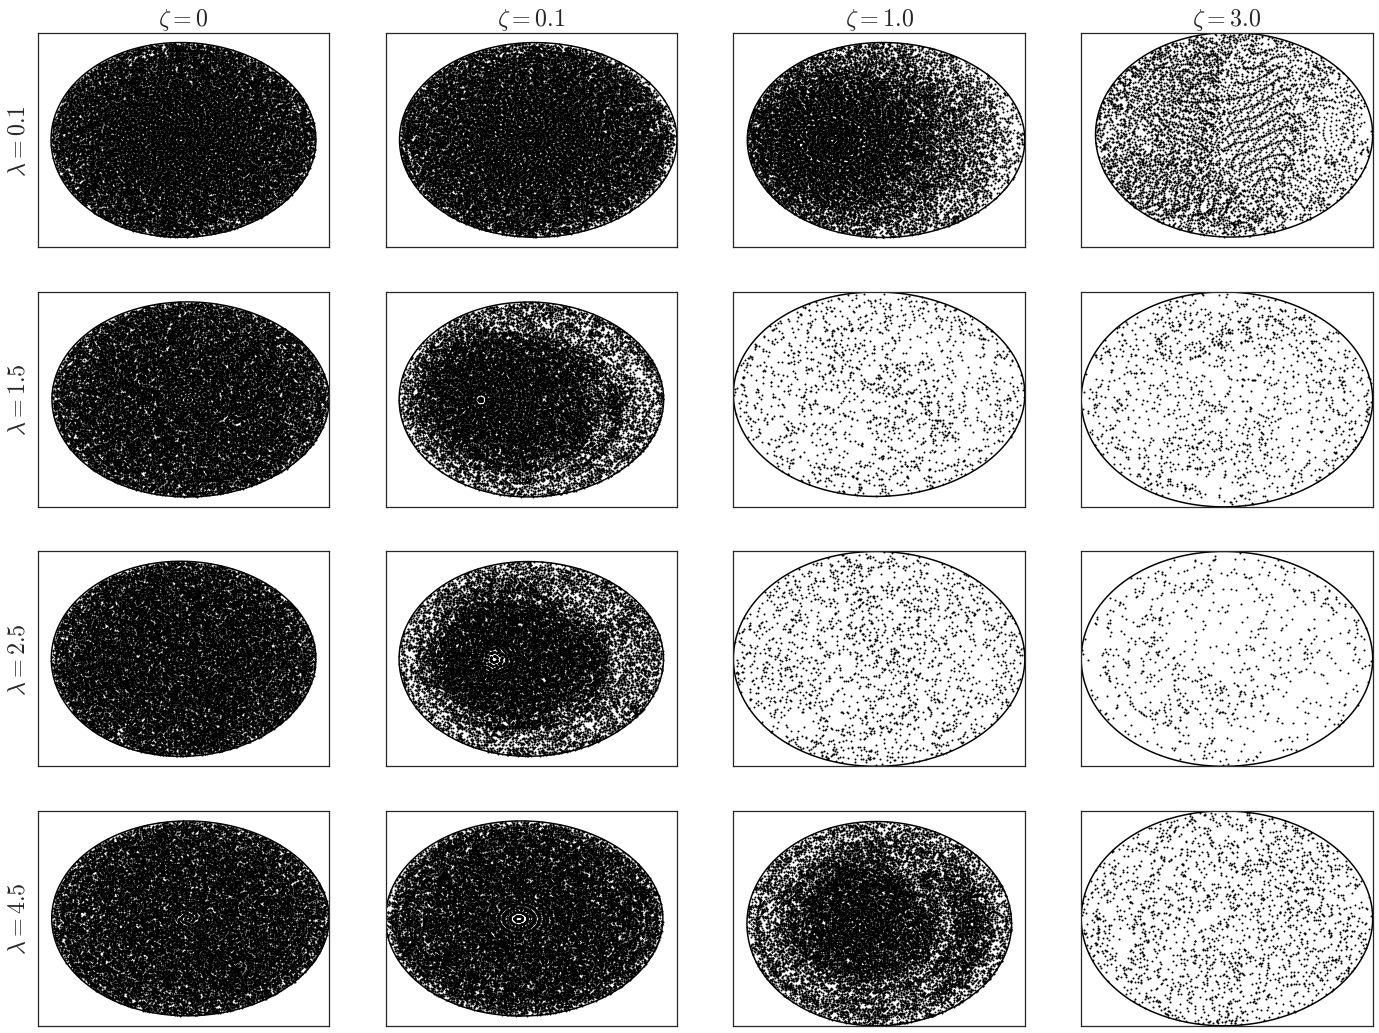

In [22]:
file_name = output_filename+'xpx_y0_zeta_lambda'

lambdas = [0.1, 1.5, 2.5, 4.5]
zetas = [0, 0.1, 1.0, 3.0]

col_labels = ['$\zeta = {}$'.format(zeta) for zeta in zetas]
row_labels = ['$\lambda = {}$'.format(lamb) for lamb in lambdas]

#----------------------------------------------------------------------------

fig, axs = plt.subplots(4,4, figsize=(20, 15))

for ax, col in zip(axs[0], col_labels):
    ax.set_title(col)
for ax, row in zip(axs[:,0], row_labels):
    ax.set_ylabel(row, rotation=90, size='large')
fig.tight_layout()

with open(file_name+'.npy', 'rb') as ps_list:
    ps_list = np.load(ps_list, allow_pickle=True)

for lambda_num in range(len(lambdas)):
    for zeta_num in range(len(zetas)):

        lamb = lambdas[lambda_num]
        zeta = zetas[zeta_num]
        
        h_cmesh, v_cmesh, energy_mesh, coord_nums, traj_intersect = ps_list[lambda_num][zeta_num]

        axs[lambda_num][zeta_num].contour(h_cmesh, v_cmesh, energy_mesh, colors='black', levels = [energy_level])
        axs[lambda_num][zeta_num].scatter(traj_intersect[:,coord_nums[0]],traj_intersect[:,coord_nums[1]],\
                                          s = 1, c = 'k')
        axs[lambda_num][zeta_num].set_xticklabels([])
        axs[lambda_num][zeta_num].set_yticklabels([])

plt.savefig(file_name)